**Workflow Fundamentals - Introduction**

The most basic idea of how machine learning and deep learning works is to take data from the past, build an algorithm (neural network) to discover the patters that is in the data and use these patterns to calculate predictions. There are many ways to recognize these patterns and more are being discovered as research continues.

But, there's no reason for us to go deep into these things yet. Let's start small.

We'll see if we can build a PyTorch model that can reccognize the patterns of a straight line and match it. 

**Coverage**

Basically, this entire chapter will be split into 6 steps. Let's start breaking it down:

1. **Getting Data Ready** - Data can be taken in any shape and form. However, in this case, it's going to be just a simple straight line.
   
2. **Building a Model** - The model will be the one to recognize patterns in the data. It'll be the one to create predictions. So in this step it'll be a bit more in-depth. We're going to need a *loss function* and a *optimizer* to form a training loop.
   
3. **Fitting The Model To Data - Training** - Now that we have a model and data. We're going to need to find away for our model to identify the patterns in the *training data* that we have.

4. **Making Predictions & Evaluating a Model - Inference** - Once our model has identified patterns and have created predictions, we need to evaluate these predictions that it's making. We can do this by comparing the predictions to our *testing data*.

5. **Saving & Loading a Model** - If you want to use your model elsewhere or share it. We need to save and load it. We'll be tackling that in this section.

6. **Putting it Together** - We'll be combining all these steps into one.

**Getting Started**

First, we need to make sure that we can remind ourselves about this entire process. So we'll make this into a dictionary so that we can put this up anytime we need it without having to scroll all the way up.

In [1]:
chapter_coverage = {
    1: "Data - Prepare & Load",
    2: "Fitting Model To Data - Training",
    3: "Making Predictions & Evaluation of Predictions - Inference",
    4: "Saving & Loading a Model",
    5: "Putting it Together",
}

Let's first start off with the imports. Naturally, we'll impot torch. But at the same time we have to import *torch.nn* - The *nn* stands for neural network and it includes all that we need for creating a neural network in PyTorch. We'll also import matplotlib for visualization of our data.

In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn
torch.__version__

'2.1.2+cu121'

**Preparing Data**

It is important to always remember that 'data' can take the form of almost anything possible. Tables of numbers such as those in excel spreadsheets, YouTube videos, audio files for music or podcasts, images, text, protein structures (DNA), and many more. 

So we have all these data. What do we do with it?

1. We turn our data into numbers - a representation of it in number-form. 
2. We choose / build a model to learn these representations of the data as best as possible.

We can do both at the same time. Now, what if we don't have data?

No problem, we can make our data. Since we're making a straight line. Let's go ahead and do that. We'll be using linear regression to create the data with known *parameters* / *weights* - these are things that can be learned by a model. Then using PyTorch, we'll check if we can build a model to estimate these parameters using gradient descent. 

**NOTE:** Linear regression is as simple as trying to find the shortest and best-fitting path from point A to point B.


In [3]:
# creating 'known' parameters
weight = 0.7
bias = 0.3

# creating data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], X.shape, y [:10], y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 torch.Size([50, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

So as we can see, X has 50 rows in a single column. If we put 0 instead of 1 in the unsqueeze function it would show [1, 50] instead which is 1 row of 50 columns. But that won't show exactly 50 because it would be truncated for display purposes. 

In anycase, now that we have our X - features and y - labels. We need to buil a model that can learn the relatiomship between these two. 

**Splitting Data - Training & Test Sets**

Now that we have created our data, we need to split our data into three different sets. These are the followig:

1. Training Set - The model learns from this data | 60 - 80% of total data | REQUIRED
2. Validation Set - The model gets tuned on this data  | 10 - 20% of total data | Important! 
3. Testing Set - The model is evaluated on this data | 10 - 20% of total data | REQUIRED

You can think of validation set as taking a quiz while testing set is akin to taking an exam. 

For now, we'll be fine with just the training and testing set. That way we can have our datasets for the model to be trained and evaluated on. We'll start by splitting our X and Y tensors. Usually, for already prepped datasets, these are already stored on different folders. But here since we're making our data ourselves, we'll have to manually split some off our created data. 

**NOTE:** It is very important that data we are going to use for the training set is kept away at the start and unseen by the model. This is so that we can check if our model is overfitting. That means that the model is trained to only identify the images in the training set and is incapable of recognizing general patterns that we want. Remember that we want to recognize general patterns of the data that we are using. 

In [4]:
train_split = int(0.8 * len(X))  # 80% of data used for training set, 20% used for testing set.
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

We have now successfully split our samples into 40 for the training set and 10 for the testing set. So our model will utilize the *X_train* & *y_train*. It will determine the relationship between these two. Afterwards, we will test what it has learned from this using our *X_test* and *y_test* dataset.

Going back to our data, it's a bit hard to understand considering that it's all just a set of numbers. Since we're dealing with lines, let's try to graph it out using matplotlib. 

Starting by creating a function to visualize it. 

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions = None
                    ):

    # This plots the training and testing data. In addition it also compares predictions.

    plt.figure(figsize=(10,7))
    
    # Plots training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    
    # Plots testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    
    
    if predictions is not None:
        # Plots the predictions in red - if there are predictions made on the test data
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14});

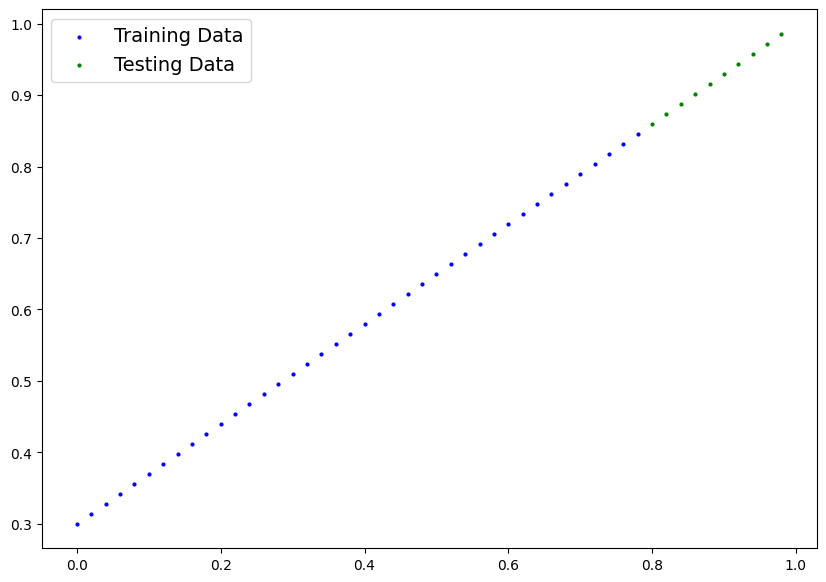

In [6]:
plot_predictions()

In [7]:
train_maxValue = X_train.max()
train_minValue = y_train.min()

test_maxValue = X_test.max()
test_minValue = y_test.min()

print(f"Train Min Value: {train_minValue}")
print(f"Train Max Value: {train_maxValue}")
print(f"Test Min Value: {test_minValue}")
print(f"Test Max Value: {test_maxValue}")

Train Min Value: 0.30000001192092896
Train Max Value: 0.7799999713897705
Test Min Value: 0.8600000143051147
Test Max Value: 0.9800000190734863


It's a straight line! Starting from 0.3 to nearly 1. We can notice that Train dataset stops near 8 because that's 80% of what we specified while the remaining 20% is on Test dataset. It's a lot easier to work with things if they are visualized. So it's really great if you can make work with matplotlib. 

**Building The Model**

Not that we have our data, we'll use the blue dots (80% of our training data) to predict the green dots (the remaining 20% in the test set). 
We'll create a standard linear regression model using pure PyTorch. Basically we'll be creating a line model.

In [8]:
# Creating a linear regression model class

class LinearRegressionModel(nn.Module): # Almost everything in PyTorch is a nn.Module. Think of these as Lego blocks that you use to assemble.
    def __init__(self):
        super().__init__()
        # Random weight & bias are always set at start as this will just be adjusted during the training mode
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))
                                    
    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (training/testing features)
        return self.weights * x + self.bias # <- the linear regression formula (y = m*x + b)

LinearRegressionModel is a child of the nn.Module class. That is described by the super().__init__() is coming from. It has two attributes which are the weights and bias that are randomly generated and are tracked by PyTorch using requires_grad. 

Forward is the calculation method of the model. This is where the predictions are made from the training/testing datasets using the formula provided by linear regression. *x: torch.Tensor* is a typehint wherein this just simply describes that the x should be of type *torch.Tensor*. The *-> torch.Tensor:* is also a typehint that indicates that the output of the functin is also a *torch.Tensor*. These do not affect the runtime of the code. It's purpose is simply for easier readability.


**PyTorch Model Building Essentials**

There are four (give or take) critical modules that you can use to create almost any kind of neural network that you want. These are the following: *torch.nn*, *torch.optim*, *torch.utils.data.Dataset*, *torch.utils.data.DataLoader*. We'll discuss about the first two then later on for the latter. 

1. *torch.nn* - This contains many functions and classes to build neural networks from activation layers to loss functions and many more. It is primarily a namespace for building neural networks. If you want access to predefined layers, functions, and utilities. It's all here.
 
3. *torch.nn.Parameter* - Stores tensors that can be used with the nn.Module. If specifed with the condition of *requires_grad=True*. PyTorch will track all the operations conducted. Gradients are used for updating model parameters. **Note:** Parameters/Weights are used interchangeably.
   
4. *torch.nn.Module* - This is the base class for all neural network modules. All the neural network building blocks are subclasses. When building a neural network in PyTorch, models should be subclasses of the nn.Module. Requires a forward() method be implemented. If you want to make your own custom neural network, you subclass it to *torch.nn.Module*.
   
5. *torch.optim* - This contains many optimization algorithms. These algorithms are the one's that improve the loss rate and update the model parameters in *nn.Parameters*. Examples are Stochastic Gradient Descent or SGD.
   
6. *def forward()* - All nn.Module subclasses require a forward() method. This defines the computation that happens on the data going through the *nn.Module* (e.g linear regression formula)

**Note:** Subclasses are another means of saying that this is a class that is derived from a base class or it is a child of a parent class. 

Sounds a bit complicated so let's tone it down into these:

**nn.Module**: This is the base class for all neural network modules, which can be thought of as large building blocks or layers.

**nn.Parameter**: This represents the parameters (weights and biases) of a neural network. When combined with other components within an *nn.Module*, they define the behavior of the network.

**forward()**: The forward() method defines how the *nn.Module processes* input data (tensors). It’s the core of the module where the computation is defined.

**torch.optim**: This module provides optimization algorithms that adjust the parameters (in *nn.Parameter*) to minimize the loss function, thereby improving the model’s pattern recognition from the input data.

![Display](images/01-pytorch-linear-model-annotated.png "Review of Earlier Code")

**Checking The Contents of a PyTorch Model**

Let's create an instance of the a model using the LinearRegressionModel class that we defined earlier. Let's check the paramters using *.parameters()*. Keep in mind that *nn.Parameter* is different from *parameters()*. The former is a class that is used to create weights and biases while the latter is used to access the parameters of a model

In [9]:
# We set the manual seed for nn.Parameter. It's randomly generated but by using a seed, we can make it not so random.
torch.manual_seed(42)
# This creates an instance of the model - a subclass of nn.Module that contains nn.Parameter()
model_0 = LinearRegressionModel()
# Let's take a look at the parameters within the model_0 - nn.Module subclass. 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also check what the model contains inside using *.state_dict()*

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Notice how the weights and bias are random float tensors? Remember that we specified the creation of these parameters with *torch.randn()* earlier in the class definition. It is important that we start from random because we'll still use the model to update these values to fit our data best. 

Luckily, we're not really making it too random because we can set our manual_seed meaning that while it is random, it's well within our means of being able to track the values. Since these are random values, obviously it wouldn't really do well when it comes to predicting.

**Making Predictions**

Let's start making predictions with our initialized random weights & bias. 

**NOTE:** Bias can be a fixed value and it can also be a random value that is being updated by the model similiar to weights. Both are acceptable approaches to use. If you want to have more control with the model then you can set the bias yourself. You can do this by setting *torch.requires_grad*

We can start making predictions by utilizing the torch.inference_mode(). We pass it our X_test data to see how it close it is in predicting our y_test labels. So it's making predictions for our X_test data (which it has never seen before) and then it compares that to y_test labels (ground truth). 

When we pass our data to the model, it'll go through the model's forward() method and produce a result using the computation we've defined, in this case our linear regression formula.

In [11]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0 (X_test)

# In older PyTorch code, torch.no_grad() is also used. 

We used *torch.inference_mode()* as a context manager (that's why there is a *with* preceeding it) to make the predictions. As the name suggests (inference is the same as making predictions), this function creates predictions for us. At the same time, it also turns off some features that are resource heavy such as gradient tracking which is necessary for learning but not for making predictions. These 'optimizations' make the forward-pass (data going through the forward() method) much faster.

**NOTE:** Prior to *torch.inference_mode()* there also existed a similiar function called *torch.no_grad()*. However, there are are more benefits to using *torch.inference_mode()* as it is newer, faster, and generally preferred.

Since we've created our predictions, let's take a look at them!

In [12]:
print(f"Number of Testing Samples: {len(X_test)}")
print(f"Number of Predictions Made: {len(y_preds)}")
print(f"Predicted Values:\n{y_preds}")

Number of Testing Samples: 10
Number of Predictions Made: 10
Predicted Values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


Notice that there is one prediction for each testing sample that we've provided. That's because of the data that we are using. Since we're dealing with a straight line, one X value maps to one y value. 

However, machine learning models are flexible and can handle many more mappings. For example, you can have 100 X values mapping to one, two, or three, etc. y values. It all depends on the data that you're working with. 

Since we have our predictions, let's try visualizing them to see how well we did.

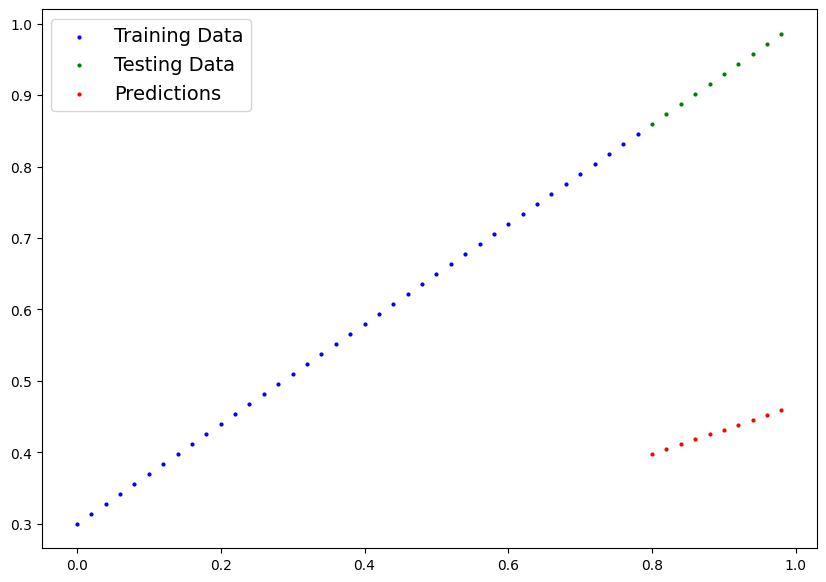

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
# We're calculating the distance from our the our y_test (labels) - ground truth to our predictions in y_preds (label predictions).
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

We're not even close. But that's alright since we were working with random values. That's like randomly guessing. We can fix that by updating our parameters. Our parameters are the weights and biases that we've set using *nn.Parameter()* and *torch.randn()*. We can change these two into something that actually represents our data. 

We could hardcode our weights and biases to get this to work exactly we want. Remember how we created the line? We specified weights = 0.7 and the bias = 0.3. But, that defeats the purpose of machine learning if we're just going to set it ourselves. It's a lot more fun if it can manage to figure that out itself. So let's try making it do exactly that.

In anycase, majority of the time, we won't even know the ideal parameters for the model and that's okay because our model's job is to figure that out. 

**Creating a Loss Function & Optimizer in PyTorch**

Let's start by working with a loss function and optimizer to make our model learn! But let's take a deeper look into these two first.

1. **Loss Function**

**What does it do?** It answers the question of how wrong the predictions of the model (y_preds) are compared to the truth labels (y_test). Typically, a lower value for the loss is better. The loss is the output of the loss function.

**Where is it in PyTorch?** You can access this *torch.nn*. There are plenty of built-in loss functions that you can choose from.

**Common Examples:** Mean Absolute Error - Regression Problems = *torch.nn.L1Loss()*, Binary Cross Entropy - Binary Classification Problems = *torch.nn.BCELoss()*

2. **Optimizer**

**What does it do?** Tells your models how to update its internal parameters (bias & weights) to lower the loss.

**Where is it in PyTorch?** You can access this in *torch.optim*. There are plenty of optimization functions you can choose from here.

**Common Examples:** Stochastic Gradient Descent = *torch.optim.SGD()*, Adam Optimizer = *torch.optim.Adam()*

Basically, we get the loss from our loss function which tells our model how wrong it is on the predictions that it's made from the forward-pass. We then take this loss and pass it to our optimizer which calculates how we can update the parameters (weights & bias) to hopefully get a lower loss error.

Your loss function and optimizer will change depending on the data and the problem that you are trying to solve. Typically, it is split into two. Regression problems which require a model to predict what is the next value using the previous values. Example of this is a weather temperature prediction, or in our case right now, a prediction for the next value of our line. 

The other problem is classification. This requires a model to predict between discrete class labels. Going with our previous example of the weather, classification would be trying to predict if tomorrow will rain or not or would it be hot or cold. Another example would be for it to detect if an image is of a dog or not a dog.

However, there are common values that are known to work well such as SGD (stochastic gradient descent) / Adam Optimizer. There is also the Mean Absolute Error loss function for regression (predicting a number) or Binary Cross Entropy loss function for classification (predicting one thing or another).

Since we're dealing with a number, let's use MAE which can be accessed by *torch.nn.L1Loss()* in PyTorch.

![Display](images/01-mae-loss-annotated.png "Mean Absolute Error")

1. Mean Absolute Difference / *torch.nn.L1Loss*: This calculates the absolte difference between two points (predictions & labels) and then takes the mean of the results of all the points. Basically, it's pretty good in calculating the distance between our predictions and labels. 

2. Stochastic Gradient Descent / *torch.optim.SGD(params, lr)*: This is a function where gradients are calculated on a curve. This uses derivatives to descend down the steepest point bit by bit by utilizing the learning rate.

**params** - is the target model parameters which we want to optimize. These are the weights and biases which we want to update.

**lr** - is the learning rate that we want to specify. Higher values means that it will try large 'jump's to go down the curve faster. However this can cause issues because it might overshoot. Lower values means that it will try smaller steps but it might take longer and thus be resource-intensive. The learning rate is considered a *hyperparameter* since we are the one's (machine learning engineer )to set it up. Common values that we can decide on ar 0.01, 0.001, 0.0001. 

In [15]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

**Creating an Optimization Loop in PyTorch**

Now that we've picked our loss function and optimizer. We technically have all that we need to start learning. We just need to REPEAT, REPEAT, REPEAT the entire proces. Basically, we now need to make a loop for all these to happen in one go. The optimization loop is technically comprised of two loops. 

**The training loop** involves the model to run through the training data and recognizing the patterns between features and labels.
**The testing loop** involves going through the testing data and evaluating the patterns (predictions) that the model has learned on the training data. Remember that the model has never seen the testing data. 

Each of these is called a 'loop' because we want our model to loop through at each sample in each dataset. We're going to use a simple Python for loop for this. In addition, there's also the unofficial optimization loop song that you can sing to remember the entire process.

![Display](images/01-pytorch-optimization-loop-song.png "Optimization Song!")

**PyTorch Training Loop**

1. Forward Pass - The model goes through all the training data using the forward() function and **creates predictions**. Represented by *model(x_train)*

2. Calculate Loss - The model's predictions are compared to the ground truth (training labels) and **evaluated to see how wrong** they are using the loss function and calculates the loss. Represented by *loss = loss_fn(y_pred, y_train)*
   
3. Zero Gradients - The optimizer's gradients are reset to zero. This is so that they don't add on each other per each loop. This is done so that the **gradients are calculated only for that specific training step**. Represented by *optimizer.zero_grad()*

4. Perform Backpropagation on Loss - **Computes the gradients** of the loss per every parameter to be updated (one's that we specifed with requires_grad=True). Basically, we retrace the steps that we took in the forward pass that gave us our loss. Represented by: *loss.backward()*

5. Update Optimizer (gradient descent) - **Updating the parameters** (weights & biases) that have *requires_grad=True* using the loss gradients. Represented By: *optimizer.step()*

![Display](images/01-pytorch-training-loop-annotated.png "Training Loop")

The above is one example of doing a training loop. However this can be quite flexible if you experiment with them. Here are some rules of thumb that you can use when working with the loop:

1. Calculate the loss before backpropagation.
2. Zero the gradients before stepping them.
3. Step the optimizer after backpropagation.

We're done with the training loop. Let's move on towards the testing loop.

1. Forward Pass - The model goes through all the testing data using the forward() function and **creates predictions**. Represented by *model(x_test)*

2. Calculate Loss - The model's predictions are compared to the ground truth (testing labels) and **evaluated to see how wrong** they are using the loss function and calculates the loss. Represented by *loss = loss_fn(y_pred, y_test)*

3. Caculate Metrics - The loss is utilized by the model for it to learn how wrong it is but it isn't entirely great for human consumption. So it's best to evaluate using a different metric, for example, accuracy on the test set. This can be done by custom functions.

Notice how the testing loop does not contain backpropagation *loss.backward* nor stepping the optimizer *optimzer.step()*. This is because we're not touching the parameters anymore because as the name suggests, we're testing the parameters on data that it hasn't seen yet. 

We've already optimized the weights in the training loop. Why is it so important to test on unseen data? So that we know that our model isn't only memorizing the training data, meaning that we trained it so much that it literally memorized our data. 

Remember that we want to recognize general patterns not memorize. That way we can use our model even on data that it has never seen before. That is the ultimate goal of machine learning.

![Display](images/01-pytorch-testing-loop-annotated.png "Training Loop")

Let's merge everything now and train our model for 100 epochs (number of forward passes through the data) and we'll evaluate it for every 10 epochs.

In [16]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Create lost list to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    ### TRAINING

    # Place model in training mode - Default state
    model_0.train()

    # Conduct forward pass on train data - Generate predictions
    y_pred = model_0(X_train)

    # Calculate the loss on the generated predictions from forward-pass with the train labels.
    loss = loss_fn(y_pred, y_train)

    # Reset gradients to zero 
    optimizer.zero_grad()

    # Conduct backpropagation - Calculate gradients
    loss.backward()

    # Step the weights - update the parameters
    optimizer.step()

    ### TESTING

    # Place the model in evaluation mode 
    model_0.eval()

    with torch.inference_mode():
        # IMPORTANT TO RENAME VARIABLES
        
        # 1. Forward Pass on test data
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

        # Print what's happening:
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819


Would ya look at that! The loss values are going down for both the training and testing datasets. THAT'S GREAT! But it's even better if we can take a look at it visually. Luckily, we converted these to numpy arrays. So we can do exactly that with matplotlib.

Explanations on *loss.detach().numpy()*

1. *loss.detach* creates a new tensor that is seperate from the tensor that it is derived from but does not require gradient calculation. This variable is now independent from all the tracking that PyTorch does on the loss.

2. *.numpy()* while matplotlib can easily handle tensors as input as this automatically converts it on its own, it's important to remember that this only works on tensors that are on the CPU. So while in this case, the *numpy()* can be removed since our tensors are only on the CPU. Remember that NumPy does not support GPU operations thus cannot take tensors on the GPU as input.

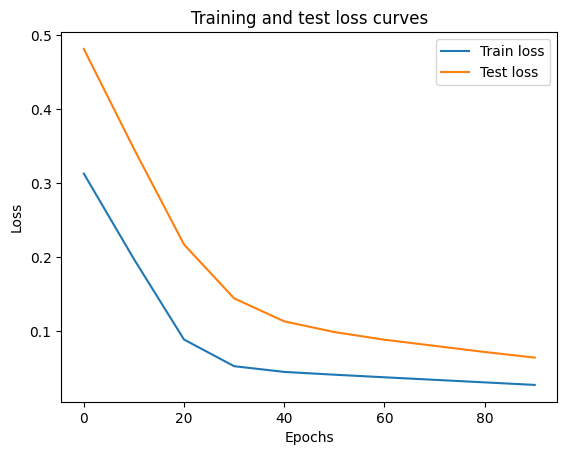

In [17]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

The loss curve is gradually going down. That's good! Recall that the loss is the 'how wrong' our model is on it's predictions so the lower it is means the better it gets. 

Thanks to our loss function and optimizer, we've managed to consistently update our weights and bias parameters to better predict our labels on both the training and testing datasets. 

Let's take a look at the model's *.state_dict()* to see how close the weights and bias values got compared to the one's that we've initially set up at the start. 

In [18]:
print("The Model Learned & Predicted The Following Values For Weights & Biases:")
print(model_0.state_dict())
print("\nThe Original Values For The Weights & Biases:")
print(f"Weights: {weight}, Bias: {bias}")

The Model Learned & Predicted The Following Values For Weights & Biases:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

The Original Values For The Weights & Biases:
Weights: 0.7, Bias: 0.3


That's already pretty close. Now that we've confirmed that our model is indeed learning! It'll probably even reach closer to our values if we kept it training for more epochs. It might not perfectly reach it but it'll get closer and that's already probably enough. 

**Making Predictions with a Trained PyTorch Model - Inference**

Since we've successfuly made our mode, it's time to make predictions with it. Technically, we've already seen it do just that in the code that we did above. The steps that we do outside of the training/testing loop are pretty similiar.

Three things to remember when making predictions:

1. Set model to evaluation mode *model.eval()*
2. Make predictions using the inference mode context manager *with torch.inference_mode(): ...*
3. Predictions should be made with objects in the same device (data & model on CUDA/GPU only)

The first two items are ensuring that all the helpful calculation and settings PyTorch uses in training/testing loop are turned off. This makes our entire process faster and prevents us from doing anything to the model. The third ensures that we don't run into cross-device errors. So keep this in mind when using models outside the training/testing loop!

In [19]:
model_0.eval()

with torch.inference_mode():
    # Make sure that the calculations of the model & data are done on the same device.
    # In this case, we've done it all on the CPU so there's no need to specify it but in the future: 
    
    # model_0.to(device)
    # X_test = X_test.to(device)
    
    y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

We've made our predictions using the trained model that we made! Let's plot these again.

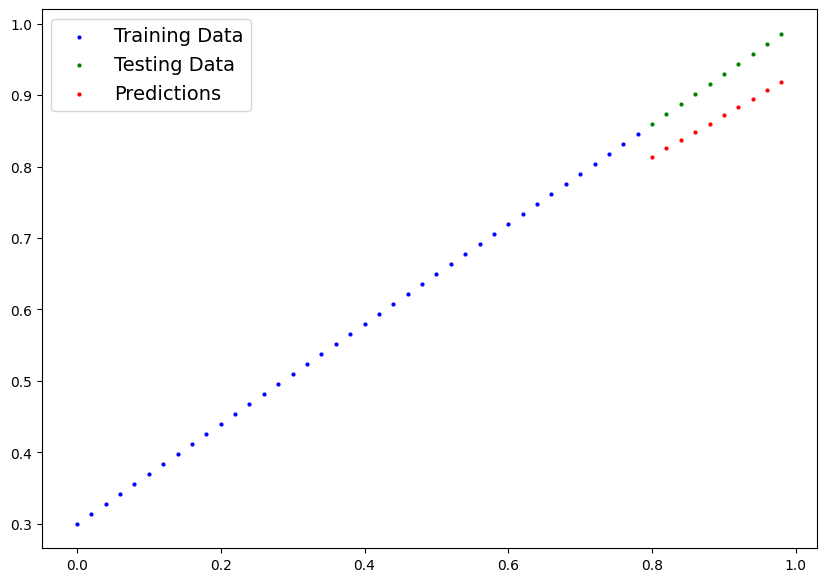

In [20]:
plot_predictions(predictions=y_preds)

That's a lot better than our randomized start. It's not exactly on point but the fact that it managed to learn our data to better get closer to it is a feat of itself! We've got a functioning model. Congratulations!

Now, we don't want our model to just stay in one place. Chances are that we would want to export it or use it somewhere else. Maybe you'd like to just save the training progress and continue it later on. 

Let's proceed to saving and reloading the model in PyTorch. There are three methods that are used:

1. *torch.save* - Save a serialized object to disk using Python's pickle utility. Models, tensors, and many other Python objects can be saved using *torch.save*.
2.  *torch.load* - Since we've saved using Python's pickle. We'll do that for unpickling as well. We use pickle to load pickle Python object files. We can also set which device the to load the object to (CPU, GPU)
3.  *torch.nn.Module.load_state_dict* - Load's a parameters dictionary *model_state_dict()* using a saved *state_dict()* object. Essentially this makes sure that the weights * biases that are trained are also set in the model.

**NOTE:** Python's pickle is NOT SECURE. So it is vital that you only unpickle data objects that you trust. The same goes for PyTorch models. Only use one's of which sources you can trust.

**Saving a PyTorch Model's - *state_dict()***

The recommened way of saving and loading a model for inference (making predictions) is by saving and loading a model's *state_dict()*.

There are three steps to do this:
1. Create a directory for saving models called models using Python's pathlib module.
2. Create a filepath for the model to be saved on.
3. Call *torch.save(obj, f)* where obj is the target model's *state_dict()* and f is the filename of where to save the model.

It is common convention for PyTorch models to end with .pt or .pth filename extensions.

In [21]:
from pathlib import Path

# Create Model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create Model Save Path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save Model State Dict
print(f"Saving Model To {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH) # By saving the state_dict() we save the models learned parameters

Saving Model To models\01_pytorch_workflow_model_0.pth


In [22]:
# Check Saved Model - Code is for Windows
!dir models\01_pytorch_workflow_model_0.pth

 Volume in drive D is NVME - Main
 Volume Serial Number is 94DF-EE1A

 Directory of D:\Jupyter\torchFun\02-Workflow\models

04/10/2024  03:52 PM             1,680 01_pytorch_workflow_model_0.pth
               1 File(s)          1,680 bytes
               0 Dir(s)  93,219,295,232 bytes free


**Loading Saved PyTorch Model's - *state_dict()***

Since we've successfully saved our model with it's learned parameters, let's use start loading it. We have *torch.nn.Module.load_state_dict(torch.load(f))*. *f* stands for the filepath for our saved model's state_dict().


So you might ask, why are we calling *torch.load* inside *torch.nn.Module.load_state_dict()*? That's because we didn't save the model exactly. We only saved the model's *state_dict()* which is the dictionary of learned paremeters only. We have to load the *state_dict()* with *torch.load()* then pass that *state_dict()* to a new instance of our model. 

So you might ask, why not just save the entire model?

It is true that saving an entire model is a lot more intuitive rather than going through this roundabout way but PyTorch documentation does state the following: 

"The disadvantage of this approach - saving an entire model is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved. Because of this, your code can break in various ways when used in other projects or after refactors."

While our approach is a lot less intuitive, it does offer a degree of flexibility. Technically, this is akin to putting our files into a USB and then finding another computer to plug it in.

Let's try this out by creating another instance of *LinearRegressionModel()*, which is a subclass of *torch.nn.Module* and because of that will have access to the built-in method of *load_state_dict()*

In [23]:
# Create a new instance of our model 
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

Seems like it managed to load in all the trained parameters that we had from our original model. Let's try it out and perform inference with it on the test data. 

In [24]:
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [25]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Seems like all the predictions line up together. That means that both models are working exactly the same way. There are plenty of ways that you can save and load PyTorch models but those can be explored in the PyTorch documentation on saving & loading models.

**Putting It All Together**

Let's practice by putting all that together in one go. However, for this case there is a specific difference. If you have a GPU, set the device to that. If not, then it'll use the CPU.

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Utilizing Device: {device}")

Utilizing Device: cuda


In [27]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [76]:
# Hardcoded Parameters
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# X - Features / y - Labels
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [77]:
# Split into Train & Test datasets

In [89]:
split = int(0.8 * len(X)) # Taking 80% of X
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

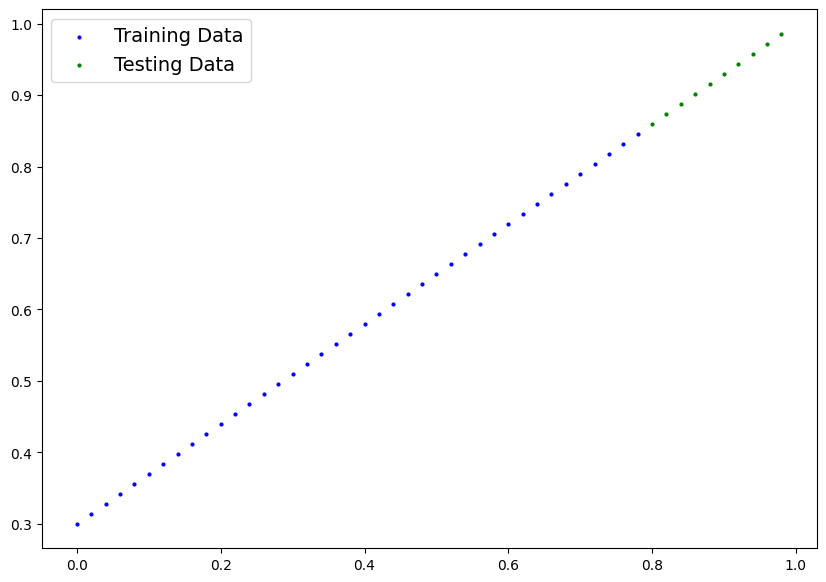

In [90]:
# Visualize Data
plot_predictions()

We'll do the same thing as we did before but with a bit of Quality of Life improvements. Such as utilizing *nn.Linear(in_features, out_features)* to describe our weights and bias without having to manually use *nn.Parameter()*. *in_features* describe the number of dimensions that the input data has and the *out_features* describe the number of dimensions that it will output. 

In this case, we specify 1 because we have 1 input feature (x) per label (y). We want to output only 1 

In [91]:
# Create Model
torch.manual_seed(seed=42)

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Using nn.Linear() for creating the model parameters
        self.linear_layer= nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

![Display](images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png "QoL Improvements")

Okay, so you might be confused with the entire in_features and out_features but let's explain this deeper. In the *nn.Parameter* we were doing everything manually. In the *nn.Linear* we are using a predefined layer that functions similiarly to what we've created with *nn.Parameter*.

Take note of the following:
**output = input x weights^T + bias**

1. *in_features*: The size of each input sample, (i.e., the number of elements in the input vector).
2. *out_features*: The size of each output sample, (i.e., the number of elements in the output vector).
3. *Weights*: A matrix where the number of rows equals *out_features* and the number of columns equals *in_features*, (*out_features*, *in_features*).
4. *Bias*: A vector with a length equal to out_features.
   
Good rule of thumb to remember is that the *in_features* and the *out_features* arguments in a predefined layer help define the shape of the weights. Since our randn only has the size of one then that it is a given that the *out_features* defaults to 1 as well. 

In *nn.Parameter* we were directly setting the shape of the weights. In the *nn.Linear* we are specifying the shape through *in_features* and *out_features*

In [92]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Notice how the *model1_state_dict()* from *nn.Linear()* created random weights and bias for us. With that done, let's put this in our GPU.

In [93]:
firstSet = next(model_1.parameters()) # We access the first set of weights in model_1.parameters()

In [94]:
firstSet.device # We check where it is stored 

device(type='cpu')

It's CPU by default so let's change this to GPU. 

In [95]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [96]:
firstSet.device

device(type='cuda', index=0)

We're now in business! We've succesfully switched it over to the GPU. Time to create a training and testing loop for our model.

We'll use the same loss_function which was *nn.L1Loss()* and *torch.optim.SGD()*. We'll have to pass in the new model's parameters as well. Retain the previous learning rate as that was already acceptable.

In [97]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

With our loss function and optimzer ready, we're all set to start with the training and testing loop. The only difference now is that we have to manually set our data to the appropriate device, in our case, the GPU. We've already put our model to the GPU so there's no worry about that. We'll do the exact same with data. 

In addition, we'll put our epochs to 1000!

In [98]:
torch.manual_seed(seed=42)
epochs = 1000

# It's important that both the data and the model are in the same device or else an error will occur.
X_train = X_train.to(device)
X_test = X_test.to(device)

y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### TRAINING
    
    # Set model to training mode
    model_1.train()

    # Forward Pass - Make Predictions
    y_pred = model_1(X_train)

    # Calculate Loss
    train_loss = loss_fn(y_pred, y_train)

    # Reset Gradients 
    optimizer.zero_grad()
        
    # Backpropagation - Calculate Gradients
    train_loss.backward()

    # Update The Weights 
    optimizer.step()

    ### TESTING

    # Set model to evaluation mode
    model_1.eval()

    # Forward Pass
    with torch.inference_mode():
        test_pred=model_1(X_test)

        # Calculate Loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 100 | Train Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 200 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 300 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 400 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 500 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 600 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 700 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 800 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 900 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882


Great! That was a lot faster since we were working with a GPU. The loss looks hella low as compared to where it started. Let's take a look on the values that it generated and see how close it got.

In [99]:
from pprint import pprint # pretty print is a python library for making pretty outputs!
print("The Model Learned The Following For Weights & Bias:")
pprint(model_1.state_dict())
print("\nThe Original Values Were The Following:")
print(f"Weights: {weights} | Bias: {bias}")

The Model Learned The Following For Weights & Bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

The Original Values Were The Following:
Weights: 0.7 | Bias: 0.3


That's pretty much as close as you can get! Remember, it's not exact but that's GOOD! However, we just know today that these parameters are the perfect one's because we set the up. But in the real world, that's not the case. At the end of the day, if we always knew what the perfect parameters one then there'd be no use for machine learning. 

**Making Predictions**

Since we've seen that our model is now trained and ready to go let's start making some predictions.

In [100]:
# Turn to Evaulation Mode
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

Remember that we're working with the GPU. As see by the device='cuda:0'. Meaning that your data is on cuda:0 which means your first GPU. We want to plot these data and see how it pans out visually. But we can't do that this time because matplotlib doesn't support tensors located in the GPU! We have to convert these back to the CPU if we want to work with it.

**NOTE:** You don't have to do *.to('device')* exactly. PyTorch also provides a QoL improvement in easily moving tensors back to the cpu by just saying *.cpu()*. That'll be enough. 

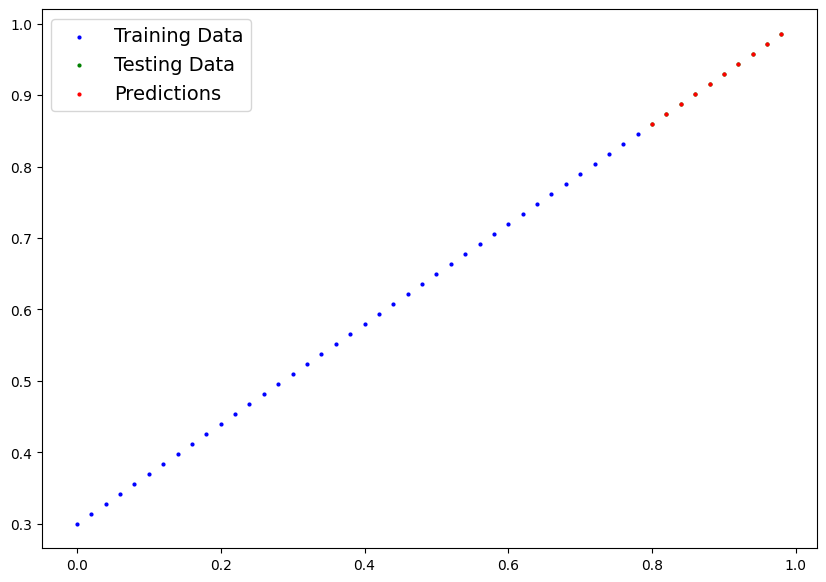

In [102]:
plot_predictions(predictions=y_preds.cpu())

It's perfectly aligned! Thanks to the number of epochs that we specified, it's managed to get as close to our testing data where you probably can't even notice the difference. Since we're happy with this, let's save the trained data and load it using another mode that we'll initialize.

**Saving & Loading Models**

In [104]:
# Create Model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create Model Save Path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save Model State Dict
print(f"Saving Model To: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH) # We're saving only the trained parameters, not the model itself.

Saving Model To: models\01_pytorch_workflow_model_1.pth


Time to load it back in!

1. Create a new instance of *LinearRegressionModelV2()*
2. Load the model state dict using *torch.nn.Module.load_state_dict*
3. Send the new instance to the target device - GPU / CPU

In [109]:
# Create new instance of model
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Choose target device for model
loaded_model_1.to(device)

print(f"Loaded Model: {loaded_model_1}")
print(f"Loaded Model To Device: {next(loaded_model_1.parameters()).device}")

Loaded Model: LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Loaded Model To Device: cuda:0


Now let's evaluate the model to see if it's predictions match up with our previous predictions on the original mode. 

In [110]:
# Set model to evaluation mode
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

We've done it! You've built and trained a neural network by yourself in pure PyTorch. Time to practice. Head over the exercises section